In [ ]:
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [ ]:
penguins = sns.load_dataset('penguins')

# 나이브 베이즈, knn(k=3), 의사결정트리(depth=3) 로 펭귄의 종을 예측하는 모델을 만들고 학습시키자. 
# 각 모델의 정확도, f1 score, precision score, recall score, roc auc score 를 출력하자.

In [ ]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
penguins.dropna(subset=["bill_length_mm"], inplace=True)
penguins.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [ ]:
penguins["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [ ]:
x = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
y = penguins["species"].map(lambda x: 0 if x == "Adelie" else 1 if x == "Gentoo" else 2)

In [ ]:
y.value_counts()

species
0    151
1    123
2     68
Name: count, dtype: int64

In [ ]:
x_scale = StandardScaler().fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, 
                                                   test_size=0.3,
                                                   random_state=1)

In [ ]:
model_list = [GaussianNB(), KNeighborsClassifier(n_neighbors=3), DecisionTreeClassifier(max_depth=3)]

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

GaussianNB
accuracy : 0.9611650485436893
f1 score : [0.95652174 1.         0.88235294]
precision score : [0.93617021 1.         0.9375    ]
recall score : [0.97777778 1.         0.83333333]
roc auc score : 0.9921810699588477

KNeighborsClassifier
accuracy : 0.9902912621359223
f1 score : [0.98901099 1.         0.97142857]
precision score : [0.97826087 1.         1.        ]
recall score : [1.         1.         0.94444444]
roc auc score : 0.9997942386831276

DecisionTreeClassifier
accuracy : 0.9611650485436893
f1 score : [0.95652174 0.98734177 0.91428571]
precision score : [0.93617021 1.         0.94117647]
recall score : [0.97777778 0.975      0.88888889]
roc auc score : 0.9951748971193416



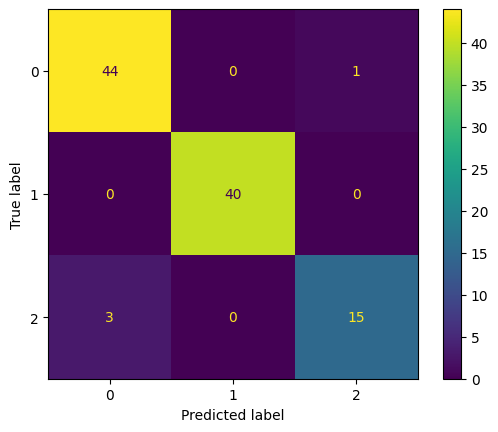

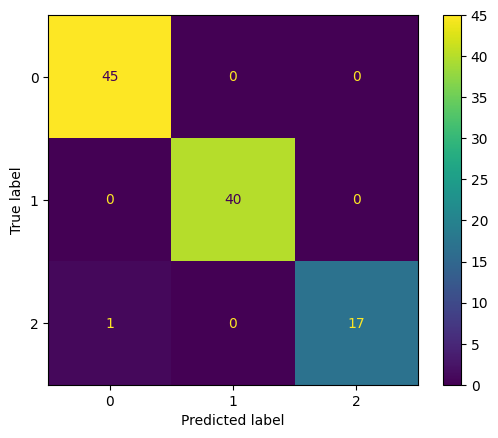

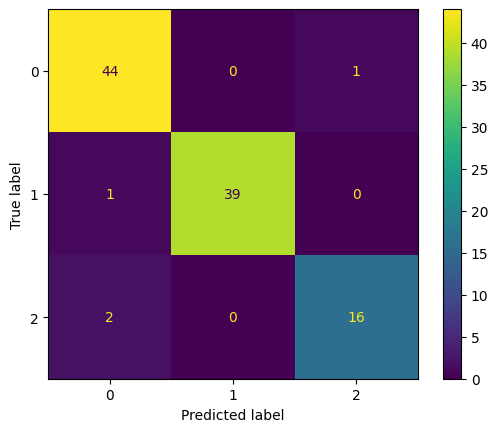

In [ ]:
for model in model_list:
    model.fit(x_train, y_train)
    
    predict = model.predict(x_test)
    proba = model.predict_proba(x_test)

    # cm = confusion_matrix(y_test, predict)
    # ConfusionMatrixDisplay(cm).plot()

    print(f"{model.__class__.__name__}")
    print(f"accuracy : {accuracy_score(y_test, predict)}")
    print(f"f1 score : {f1_score(y_test, predict, average=None)}")
    
    print(f"precision score : {precision_score(y_test, predict, average=None)}")
    print(f"recall score : {recall_score(y_test, predict, average=None)}")
    print(f"roc auc score : {roc_auc_score(y_test, proba, multi_class='ovo')}")
    print()
